In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json

In [3]:
MIN_RATINGS_FOR_USER = 100
MIN_RATINGS_FOR_Movie = 300

# dataset

In [4]:
# read imdb data
movies = pd.read_csv("data/ml-latest/movies.csv")
ratings = pd.read_csv("data/ml-latest/ratings.csv")

In [5]:
#  remove duplicates
duplicateids = movies[movies.title.duplicated(keep='first')]['movieId'].to_list()
movies=movies[~movies['movieId'].isin(duplicateids)]
ratings=ratings[~ratings['movieId'].isin(duplicateids)]

In [6]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,1225734739
1,1,110,4.0,1225865086
2,1,158,4.0,1225733503
3,1,260,4.5,1225735204
4,1,356,5.0,1225735119


In [7]:
movies = movies.set_index('movieId')
movies.head()

,title,genres
movieId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [8]:
reviews=pd.DataFrame(ratings.groupby('movieId').apply(len), columns = ['Reviews'])
meanrating = ratings.groupby('movieId')[['rating']].aggregate('mean')

In [9]:
moviesinfo=pd.concat([movies, meanrating, reviews], axis=1)

# remove insignificant movie and users

In [10]:
ratings['rating']=ratings['rating'].astype(int)

In [11]:
len(ratings)

33828467

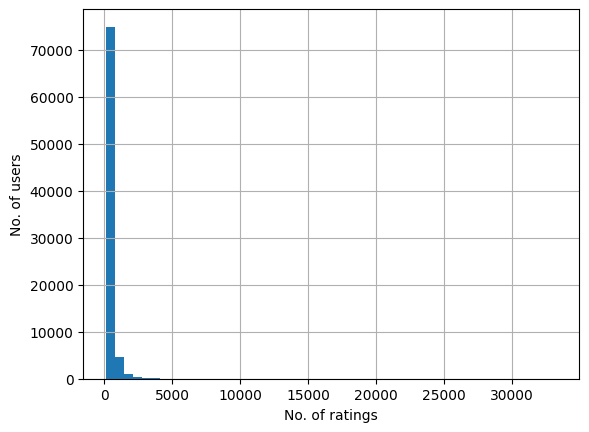

In [12]:
ratingsPerUser = ratings.groupby('userId').apply(len)
ratingsPerUser =  ratingsPerUser[ratingsPerUser>MIN_RATINGS_FOR_USER].reset_index(drop=True)
ratingsPerUser.hist(bins=50)
plt.xlabel('No. of ratings')
plt.ylabel('No. of users')
plt.show()

In [13]:
len(ratings.groupby('userId'))

330974

In [14]:
len(ratings.groupby('userId'))

330974

In [15]:
len(ratings.groupby('movieId'))

83040

In [16]:
ratingsPerUser = ratings.groupby('userId').apply(len)
insignificantUsers =  ratingsPerUser[ratingsPerUser<MIN_RATINGS_FOR_USER].index.to_list()
ratings=ratings[~ratings['userId'].isin(insignificantUsers)]

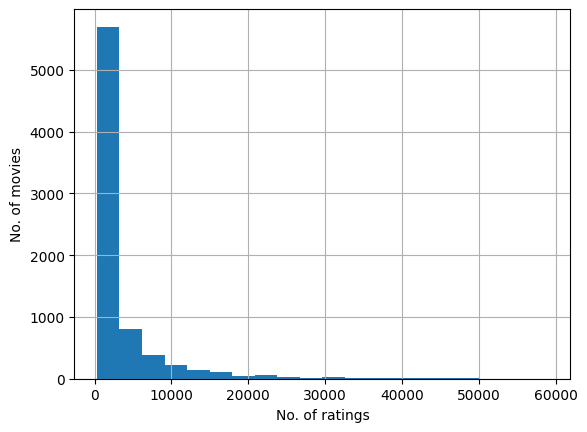

In [17]:
ratingsPerMovie = ratings.groupby('movieId').apply(len)
ratingsPerMovie =  ratingsPerMovie[ratingsPerMovie>MIN_RATINGS_FOR_Movie].reset_index(drop=True)
ratingsPerMovie.hist(bins=20)
plt.xlabel('No. of ratings')
plt.ylabel('No. of movies')
plt.show()

In [18]:
ratingsPerMovie = ratings.groupby('movieId').apply(len)
insignificantMovies =  ratingsPerMovie[ratingsPerMovie<MIN_RATINGS_FOR_Movie].index.to_list()
ratings=ratings[~ratings['movieId'].isin(insignificantMovies)]

In [19]:
len(ratings.groupby('userId'))

82049

In [20]:
len(ratings.groupby('movieId'))

7613

In [21]:
len(ratings)

25214563

In [22]:
moviesinfo = moviesinfo[~moviesinfo.index.isin(insignificantMovies)]

# pivot_table

In [23]:
cf_table = ratings.pivot_table(columns=['movieId'], values = ['rating'], index='userId')

In [24]:
cf_table.fillna(0, inplace=True)

In [25]:
cf_table.to_numpy().shape

(82049, 7613)

# save data

In [26]:
np.save('data/pivot.npy', cf_table.to_numpy().astype(int))

In [27]:
json.dump(list(cf_table.columns.droplevel(0)), open('data/movies.json', 'w+'))

In [28]:
moviesinfo.to_csv('model/moviesinfo.csv', index=False)